# Classifying Breast Cancer

This notebook has the objetive to classify if a breast cancer is malignant or benign

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
bc_data = pd.read_csv('data.csv')

In [3]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
bc_data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [5]:
bc_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Cleaning Data

In [6]:
bc_data['Unnamed: 32'].unique()

array([nan])

Droping the last column that only has NaN values

In [7]:
bc_data = bc_data.drop('Unnamed: 32', axis=1)

Dropping the 'id' column that is not necessary for the model

In [8]:
bc_data = bc_data.drop('id', axis=1)

In [9]:
bc_data.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [10]:
bc_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Separing feature columns and the target column

In [11]:
feature_columns = bc_data.columns.tolist()
feature_columns.remove('diagnosis')

Normalizing feature columns

In [12]:
bc_data[feature_columns] = pd.DataFrame(normalize(bc_data.loc[:, feature_columns], axis=0))

In [13]:
bc_data.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.040678,0.040919,0.040534,0.036935,0.041483,0.037410,0.031208,0.032855,0.041451,...,0.040189,0.040772,0.040008,0.035214,0.041313,0.035658,0.033284,0.036373,0.041002,0.040986
std,NaN,0.010147,0.009124,0.010709,0.019848,0.006055,0.018936,0.028017,0.026061,0.006273,...,0.011939,0.009760,0.012534,0.022768,0.007126,0.022065,0.025511,0.020862,0.008745,0.008818
min,NaN,0.020101,0.020598,0.019300,0.008093,0.022657,0.006949,0.000000,0.000000,0.024254,...,0.019589,0.019086,0.018803,0.007406,0.022213,0.003827,0.000000,0.000000,0.022121,0.026873
25%,NaN,0.033689,0.034301,0.033130,0.023705,0.037183,0.023276,0.010389,0.013641,0.037044,...,0.032138,0.033473,0.031373,0.020606,0.036392,0.020643,0.014001,0.020607,0.035394,0.034890
50%,NaN,0.038497,0.039965,0.038009,0.031082,0.041272,0.033212,0.021628,0.022500,0.041002,...,0.036980,0.040348,0.036427,0.027452,0.040980,0.029717,0.027721,0.031715,0.039888,0.039079
75%,NaN,0.045437,0.046244,0.045880,0.044144,0.045332,0.046754,0.045933,0.049700,0.044778,...,0.046416,0.047192,0.046774,0.043348,0.045568,0.047555,0.046822,0.051225,0.044935,0.044957


Checking for outliers using IQR
Both of the datasets will be used, after modeling the results between them will be compared

In [14]:
Q1 = bc_data.quantile(0.25)
Q3 = bc_data.quantile(0.75)
IQR = Q3 - Q1
bc_feature = bc_data[feature_columns]
bc_no_outlier = bc_feature[~((bc_feature < (Q1 - 1.5 * IQR)) |(bc_feature > (Q3 + 1.5 * IQR))).any(axis=1)]
bc_no_outlier['diagnosis'] = bc_data.loc[bc_no_outlier.index,'diagnosis']

c:\users\blueshift\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
print(bc_no_outlier.shape)
print(bc_feature.shape)

(398, 31)
(569, 30)


## ML Modeling

The function bellow receives a list of target_columns, a target_column, a df and a k number.\
Inside the function 80% of the df is sampled for training and the rest for test\
Based on parameters the function creates a KNN model and classifies the test data into B or M\
The return is the model accuracy

In [16]:
def train_test(train_columns, target_column, df, k):
    np.random.seed(4132)
    sample = np.random.rand(len(df)) < 0.6
    train = df[sample]
    test = df[~sample]
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(train[train_columns], train[target_column])
    classifications = knn.predict(test[train_columns])
    total_correct =  np.diag(pd.crosstab(test[target_column], classifications)).sum()
    return round(total_correct/len(test)*100,2)

The first test is compare the accuracy of the model with both of the datasets and with a default number of neighbors from the model (5) and with all feature columns, one with and one without outliers

In [17]:
print("Original Data: {}%".format(train_test(feature_columns, 'diagnosis', bc_data, 5)))
print("No outliers: {}%".format(train_test(feature_columns, 'diagnosis', bc_no_outlier, 5)))

Original Data: 97.61%
No outliers: 95.1%


With a the default number of neighbors, the original data had a better accuracy

Second test is compare them with different values for k with all feature_columns

In [18]:
ks = np.arange(1,26,2)

In [28]:
ks

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

test_k_values receives the same parameters as train_test except for the parameter ks which is a list containg values for\
the nearest neighbors, for each value, a model is trained, a list of lists is returned containg for each k its accuracy

In [19]:
def test_k_values(train_columns, target_column, df, ks):
    results = []
    for k in ks:
        results.append([k, train_test(train_columns, 'diagnosis', df, k)])
    return results

plot_model_accuracy receives a list of lists containg for each value a accuracy, the function plots graph based on this list

In [20]:
def plot_model_accuracy(results):
    k = []
    acc = []
    for r in results:
        k.append(r[0])
        acc.append(r[1])
    plt.xlabel('K values')
    plt.ylabel('Accuracy')
    plt.plot(k, acc)

Text(0.5, 1.0, 'Model accuracy with original data')

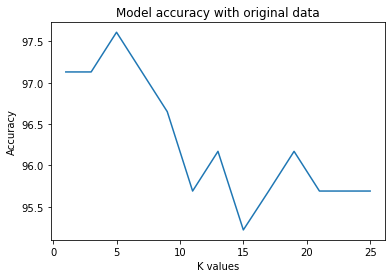

In [21]:
%matplotlib inline
original_results = test_k_values(feature_columns, 'diagnosis', bc_data, ks)
plot_model_accuracy(original_results)
plt.title("Model accuracy with original data")

Text(0.5, 1.0, 'Model accuracy with no outlier')

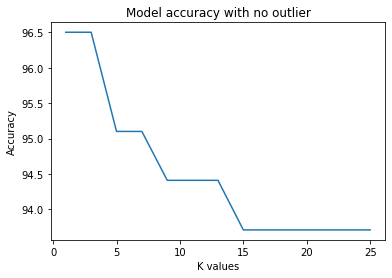

In [22]:
%matplotlib inline
no_outlier_results = test_k_values(feature_columns, 'diagnosis', bc_no_outlier, ks)
plot_model_accuracy(no_outlier_results)
plt.title("Model accuracy with no outlier")

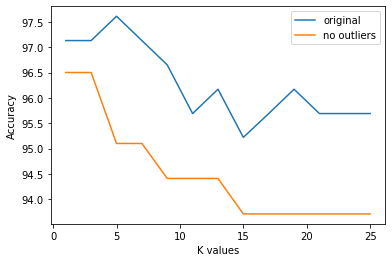

In [23]:
plot_model_accuracy(original_results)
plot_model_accuracy(no_outlier_results)
plt.legend(['original', 'no outliers'])

The model working with all the features has a higher accuracy when using a low number of neighbors and using data without outliers

The last test is to check if using a combination of the columns with the best accuracy results has an accuracy higher than the accuracy using all columns.\
For this test the original data will be used

Calculating which single columns have the best accuracy

In [24]:
column_results = []
for c in feature_columns:
    column_results.append([c, test_k_values([c], 'diagnosis', bc_data, ks)])

In [25]:
column_avg = []
for c in column_results:
    avg = np.array(c[1])[:,1].mean()
    column_avg.append([c[0], avg])
best_features = pd.DataFrame(column_avg).sort_values(ascending = False, by=1)
best_features

,0,1
7,concave points_mean,90.616923
20,radius_worst,89.620000
27,concave points_worst,89.547692
23,area_worst,89.399231
22,perimeter_worst,89.106923
6,concavity_mean,88.076923
2,perimeter_mean,87.006923
3,area_mean,86.935385
0,radius_mean,86.453846
26,concavity_worst,84.984615


Comparing the accuracy using 4 combinations of the best features and the accuracy using all columns

7     concave points_mean
20           radius_worst
Name: 0, dtype: object


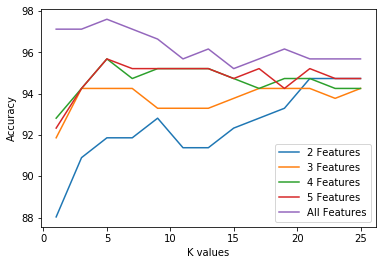

In [26]:
%matplotlib inline
best_2_feature = best_features.iloc[:2][0]
best_3_feature = best_features.iloc[:3][0]
best_4_feature = best_features.iloc[:4][0]
best_5_feature = best_features.iloc[:5][0]
best_features_list = [best_2_feature, best_3_feature, best_4_feature, best_5_feature , feature_columns]

legend = ['2 Features', '3 Features', '4 Features', '5 Features', 'All Features']
for f in best_features_list:
    results = test_k_values(f, 'diagnosis', bc_data, ks)
    plot_model_accuracy(results)
print(best_2_feature)
plt.legend(legend)

Even trying 5 different combinations of columns, the result with all features is still better